#**Handwritten Digit Classification using MNIST and Logistic Regression.**

This script loads the MNIST dataset, preprocesses it, trains a logistic regression model,
evaluates the model, and displays some predictions.

## Load Dataset

In [1]:
from sklearn.datasets import fetch_openml
import numpy as np
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist.data, mnist.target.astype(np.int64)

print("Dataset shape:", X.shape)

Dataset shape: (70000, 784)


## Split Dataset

In [2]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Feature Scaling

In [3]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Train Logistic Regression Model

In [4]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(multi_class='multinomial', solver='saga', max_iter=100, n_jobs=-1)
model.fit(X_train_scaled, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(multi_class='multinomial', n_jobs=-1, solver='saga')

## Evaluate Model

In [5]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
y_pred = model.predict(X_test_scaled)
acc = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {acc:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Test Accuracy: 0.9186

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.96      1343
           1       0.92      0.97      0.94      1600
           2       0.93      0.90      0.91      1380
           3       0.90      0.89      0.90      1433
           4       0.91      0.93      0.92      1295
           5       0.89      0.88      0.88      1273
           6       0.94      0.95      0.95      1396
           7       0.92      0.94      0.93      1503
           8       0.91      0.85      0.88      1357
           9       0.91      0.90      0.90      1420

    accuracy                           0.92     14000
   macro avg       0.92      0.92      0.92     14000
weighted avg       0.92      0.92      0.92     14000



## Visualize Predictions

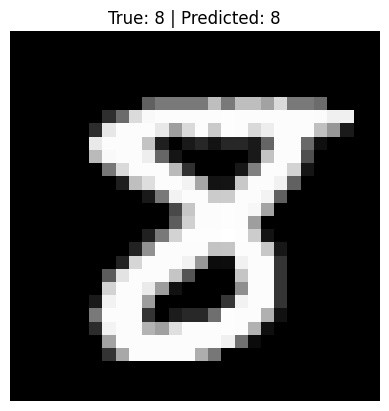

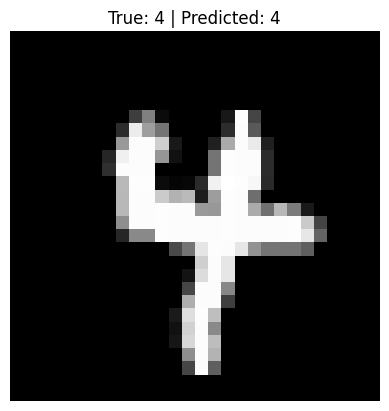

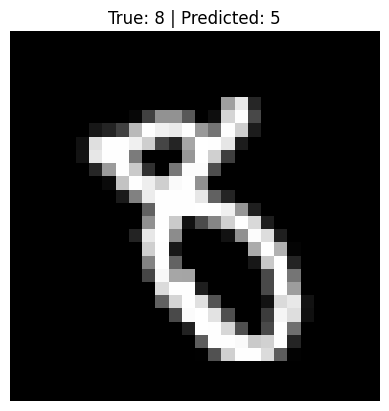

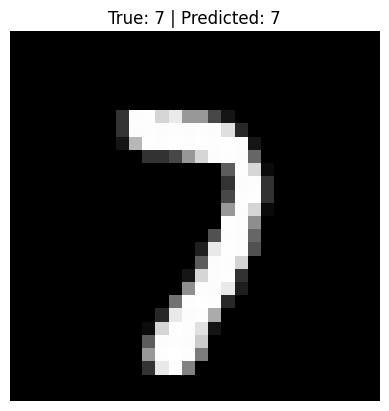

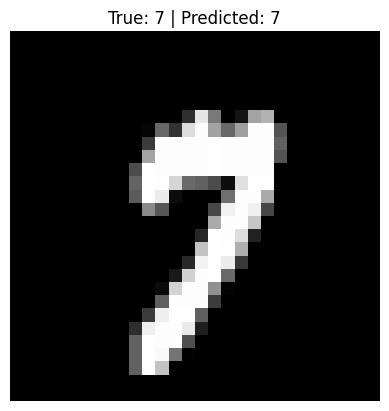

In [6]:
import matplotlib.pyplot as plt
for i in range(5):
    img = X_test.iloc[i].values.reshape(28, 28)
    plt.imshow(img, cmap='gray')
    plt.title(f"True: {y_test.iloc[i]} | Predicted: {y_pred[i]}")
    plt.axis('off')
    plt.show()

## Save Model and Scaler

In [7]:
import joblib
joblib.dump(model, "logistic_model.joblib")
joblib.dump(scaler, "scaler.joblib")

['scaler.joblib']